In [157]:
%run evaluation_functions.py
%matplotlib inline

## Load Network

In [4]:
opt, network, save_directory = load_network_stuff()

Number of parameters in encoder 5092750
Number of parameters in decoder 5092750
AE_L1_488k/checkpoint_epoch_60.pth.tar
<All keys matched successfully>


## Generate Images

In [72]:
idx = 0
mode = 'test'
dataset = dloader.dataset(opt, mode=mode, return_mode='all', img_size=512)

horizontal, vertical, diagonal = dataset.get_all_directions(idx)
grid_tensor = dataset.get_whole_grid(idx)[...,16:-16,16:-16]
grid_tensor_full = dataset.get_whole_grid(idx)

In [73]:
ratios = list(zip(np.round(np.linspace(0,1,11),1)[::-1],np.round(np.linspace(0,1,11),1)))
angles = [np.arctan(x/y)/np.pi*180 for y,x in ratios]

C:\Users\valen\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
generated_angles = [network.pass_through_image_sum(horizontal,vertical,x,y,x+y) for x,y in ratios]

In [ ]:
generated_diagonal = network.pass_through_image(diagonal)

In [110]:
for x, y in ratios[1:-1][::-1]:
    generated_angles.append(network.pass_through_image_sum(reverse_tensor(horizontal,1),vertical,x,y,x+y))
angles = angles+[angle+90 for angle in angles[1:-1]]

90it [00:37,  2.39it/s]
90it [01:05,  1.37it/s]
90it [01:16,  1.18it/s]
90it [01:21,  1.11it/s]
90it [01:26,  1.04it/s]
90it [01:16,  1.18it/s]
90it [01:25,  1.06it/s]
90it [01:24,  1.07it/s]
90it [01:19,  1.13it/s]


## Get Positions

In [111]:
positions = get_positions(grid_tensor,generated_angles)
positions_diagonal = get_positions(grid_tensor,generated_diagonal)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  2.37s/it]


#### Save Generated

In [ ]:
save_dict_stuff(mode, idx, ratios, angles, generated_angles, generated_diagonal, positions, positions_diagonal)

#### Load Generated

In [109]:
name = "generatedTest0"
opt, save_directory, mode, idx, ratios, angles, generated_angles, generated_diagonal, positions, positions_diagonal, horizontal, vertical, diagonal, grid_tensor, grid_tensor_full = load_dict_stuff(name)

## Plot

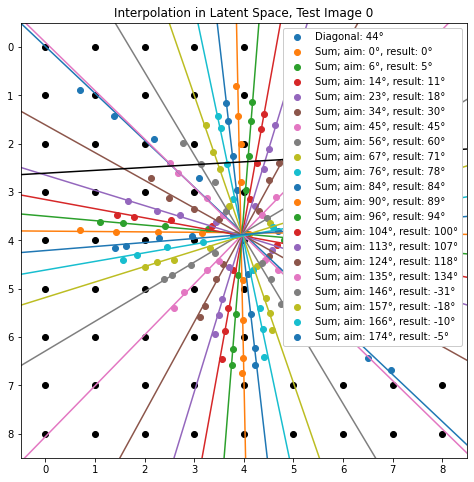

In [112]:
plot_grid()

plot_with_fit(positions_diagonal,"Diagonal: ")

for ind in range(len(positions)):
    plot_with_fit(positions[ind],"Sum; aim: {:.0f}°, result: ".format(angles[ind]))

plot_first_fit(positions)

plt.legend(fancybox=True, framealpha=1)
plt.title("Interpolation in Latent Space, T"+mode[1:]+" Image "+str(idx))
#plt.savefig(save_directory+"/summary_plots/LatentSpaceSumT"+mode[1:]+str(idx)+".pdf")
plt.show()

## GIF

In [130]:
images = [stack[0] for stack in generated_angles]+[stack[-1] for stack in generated_angles]
images = [to_image(image) for image in images]
images[0].save('test.gif', save_all=True, append_images=images[1:], optimize=False, duration=250, loop=0)

In [129]:
def image(x): return images[x]
interact(image, x=widgets.IntSlider(min=0, max=39, step=1, value=0));

interactive(children=(IntSlider(value=0, description='x', max=39), Output()), _dom_classes=('widget-interact',…

# Test Position Algorithm

In [115]:
smooth = GaussianSmoothing(1)
def smooth_image(image):
    return smooth(image.unsqueeze(0)).squeeze(0)
to_image_trafo = transforms.ToPILImage()
def to_image(image): return to_image_trafo(aux.denorm(image))

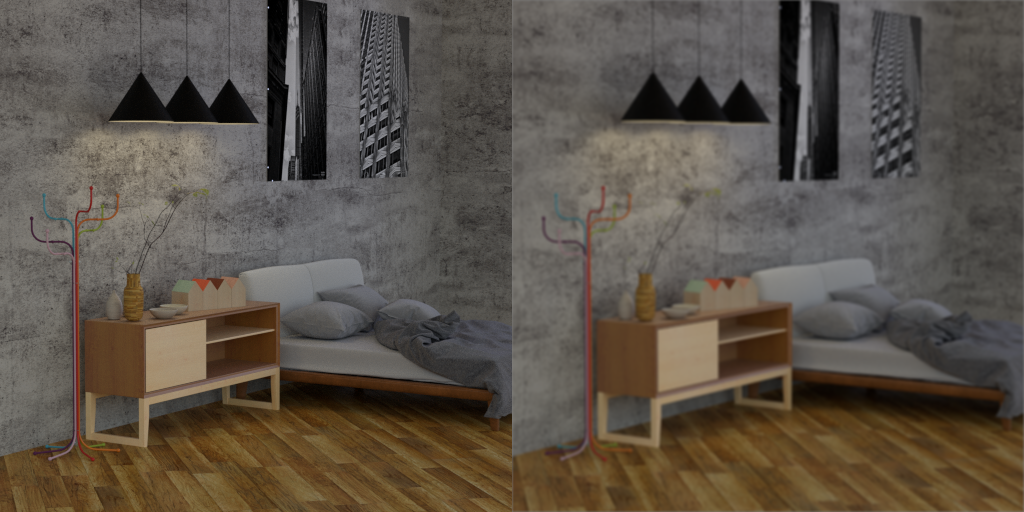

In [116]:
get_concat_h(to_image(horizontal.transpose(0,1)[0]),
             to_image(smooth_image(horizontal.transpose(0,1)[0])))

In [159]:
comparison_grid = grid_tensor[::2,::2,...]
positions_orig = get_original_positions(comparison_grid,grid_tensor)
positions_orig_smoothed = get_original_positions(comparison_grid,grid_tensor, smooth_image)

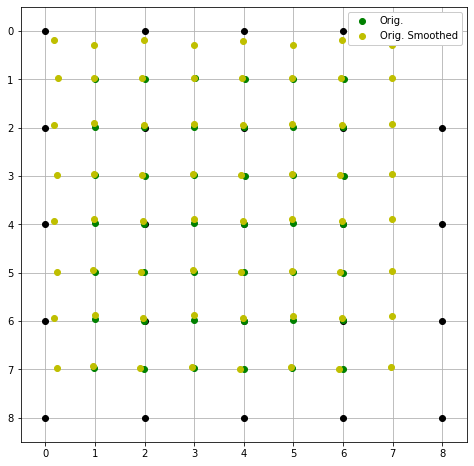

In [160]:
plot_grid(5,True)
plot_original_positions(positions_orig, 2, "Orig.","g")
plot_original_positions(positions_orig_smoothed, 2, "Orig. Smoothed","y")
plt.legend(fancybox=True, framealpha=1)
#plt.title("Testing Position Algorithm Minimum, Test Image "+str(idx)+"")
#plt.savefig("TestPositionAlrogithmTest"+str(idx)+".pdf")
plt.show()